# Summary of SCENIC+ result

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import numpy as np

In [2]:
subclasses = [
    "L2_3_IT", "L4_IT", "L5_IT", "L6_IT", "L6_CT", "L5_ET",
    "SST", "VIP", "PVALB"
]

In [3]:
root_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/"
os.chdir(root_dir)

In [4]:
subclass_df = dict()
for subclass in subclasses:
    direct_file = Path(subclass) / "scplus_outputs" / "eRegulon_direct.tsv"
    extend_file = Path(subclass) / "scplus_outputs" / "eRegulons_extended.tsv"
    direct_df = pd.read_csv(direct_file, sep="\t", header=0)
    extend_df = pd.read_csv(extend_file, sep="\t", header=0)
    ereg_df = pd.concat([direct_df, extend_df], axis=0)
    subclass_df[subclass] = ereg_df

In [5]:
n_sub = len(subclasses)
plot_df = pd.DataFrame({
    "subclass": subclasses,
    "TF": np.zeros(n_sub, dtype=np.int32),
    "Gene": np.zeros(n_sub, dtype=np.int32),
    "cCRE": np.zeros(n_sub, dtype=np.int32)
})
for k, df in subclass_df.items():
    plot_df.loc[plot_df["subclass"] == k, "TF"] = len(df["TF"].unique())
    plot_df.loc[plot_df["subclass"] == k, "Gene"] = len(df["Gene"].unique())
    plot_df.loc[plot_df["subclass"] == k, "cCRE"] = len(df["Region"].unique())
plot_df["subclass"] = pd.Categorical(plot_df["subclass"], categories=subclasses)
plot_df_long = plot_df.melt(
    id_vars="subclass",
    value_vars=["TF", "Gene", "cCRE"],
    var_name="variable",
    value_name="value"
)

In [10]:
plot_df

,subclass,TF,Gene,cCRE
0,L2_3_IT,108,8829,41067
1,L4_IT,82,9171,36258
2,L5_IT,109,8664,41201
3,L6_IT,89,7240,30661
4,L6_CT,80,7558,27749
5,L5_ET,26,9513,34490
6,SST,100,5843,23295
7,VIP,90,6438,28386
8,PVALB,46,2273,8003


In [11]:
plot_df.to_csv(
    "../../../analysis/final_figures/new_summary_20250519/All_network_table.csv", 
    sep="\t", header=True, index_label=False, index=False)

In [8]:
figure_dir = "../../../analysis/final_figures/new_summary_20250519"

In [6]:
plot_df_long_tf = plot_df_long[plot_df_long["variable"] == "TF"]

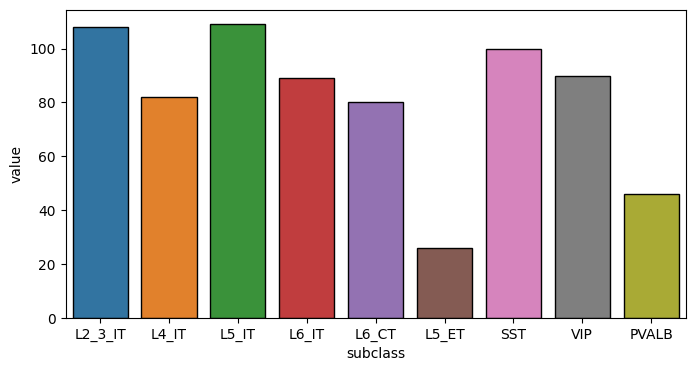

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(4)
sns.barplot(
    data=plot_df_long_tf,
    x="subclass",
    y="value",
    hue="subclass",
    ax=ax,
    edgecolor="black"
)
fig.savefig(os.path.join(figure_dir, "All_network_tf_bar.pdf"), dpi=300, format="pdf")

In [10]:
plot_df_long_gene = plot_df_long[plot_df_long["variable"] == "Gene"]

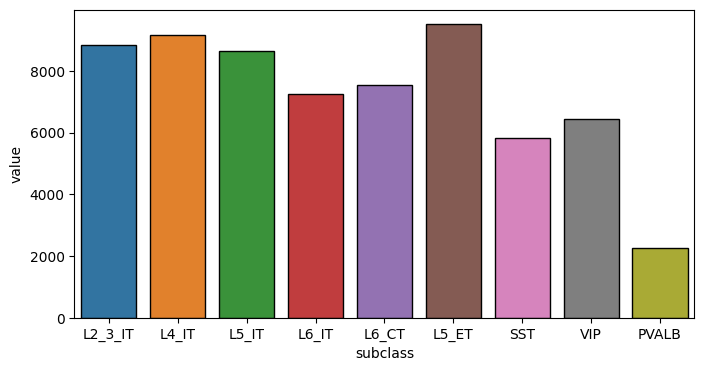

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(4)
sns.barplot(
    data=plot_df_long_gene,
    x="subclass",
    y="value",
    hue="subclass",
    ax=ax,
    edgecolor="black"
)
fig.savefig(os.path.join(figure_dir, "All_network_gene_bar.pdf"), dpi=300, format="pdf")

In [15]:
plot_df_long_peak = plot_df_long[plot_df_long["variable"] == "cCRE"]

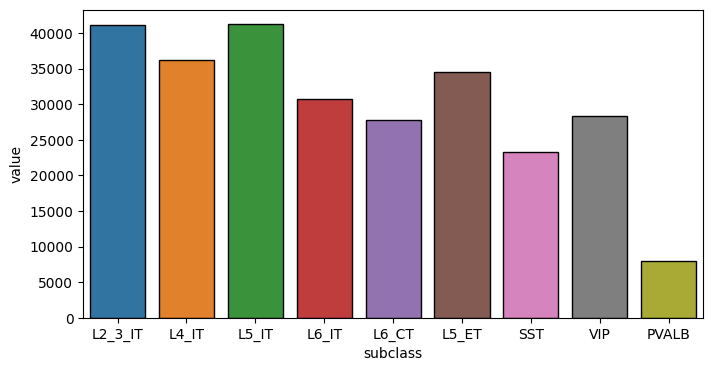

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(4)
sns.barplot(
    data=plot_df_long_peak,
    x="subclass",
    y="value",
    hue="subclass",
    ax=ax,
    edgecolor="black"
)
fig.savefig(os.path.join(figure_dir, "All_network_peak_bar.pdf"), dpi=300, format="pdf")